## โปรแกรมสร้างกราฟกำไรขาดทุนของ Options 

#### แกนตั้ง แสดงถึง ผลกำไร หรือผลขาดทุนจากการลงทุนในออปชันนั้นๆ โดย ส่วนบนของแกนจะแสดงถึงผลกำไร และส่วนล่างของแกนจะแสดงถึงผลขาดทุน

#### แกนนอน แสดงถึง ราคาสินทรัพย์อ้างอิงของออปชันนั้นๆ โดยราคาที่อยู่ทางด้านขวาของแกน จะมีค่าสูงกว่าราคาที่อยู่ทางด้านซ้าย





Strategy:     Short Call
Strike Price: 900
Premium:      20.0
Breakeven:    920.0


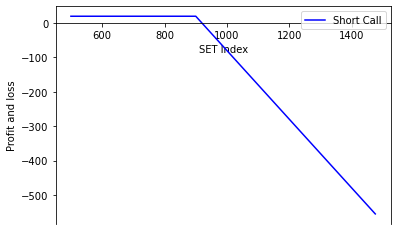

In [4]:
from tkinter import *
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
import seaborn


Type_list = ['Call', 'Put'] # สร้าง list ชนิดของ options
Side_list = ['Long', 'Short'] # สร้าง list ผั่งซื้อและขาย
sT = np.arange(500,1500,25) # สร้าง list เป็นช่วงของราคาใช้ในการคำนวณและ plot graph
#sT = np.arange(strike*0.6,strike*1.4,25)

def call_payoff(sT, strike_price, premium): # function คำนวณกำไรขาดทุนของ call option
    pnl = np.where(sT > strike_price, sT - strike_price, 0)    
    return pnl - premium

def put_payoff(sT, strike_price, premium): # function คำนวณกำไรขาดทุนของ put option
    pnl = np.where(sT < strike_price, strike_price - sT, 0)
    return pnl - premium

def plot_LC(payoff_long_call): #function plot กราฟกำไรขาดทุนของกลยุทธ์ long call
    fig, ax = plt.subplots() #subplot คือกราฟย่อย เราจะสร้างกราฟย่อยกี่อันลงบนฉากก็ได้
    ax.spines['bottom'].set_position('zero')# เส้นแกนล่างเริ่มที่ 0
    ax.plot(sT,payoff_long_call,label='Long Call',color='r') # คำสั่งวาดกราฟ long call ให้กราฟสีแดง
    plt.xlabel('SET Index') #แกน x ตั้งชื่อว่า SET Index
    plt.ylabel('Profit and loss') #แกน y ตั้งชื่อว่า Profit and loss
    plt.legend() # เพิ่มคำอธิยาบเส้นกราฟ
    plt.show() # โชว์กราฟ

def plot_SC(payoff_short_call): #function plot กราฟกำไรขาดทุนของกลยุทธ์ short call
    fig, ax = plt.subplots() 
    ax.spines['bottom'].set_position('zero')
    ax.plot(sT,payoff_short_call,label='Short Call',color='b')
    plt.xlabel('SET Index')
    plt.ylabel('Profit and loss')
    plt.legend()
    plt.show()

def plot_LP(payoff_long_put): #function plot กราฟกำไรขาดทุนของกลยุทธ์ long put
    fig, ax = plt.subplots()
    ax.spines['bottom'].set_position('zero')
    ax.plot(sT,payoff_long_put,label='Long Put',color='g')
    plt.xlabel('SET Index')
    plt.ylabel('Profit and loss')
    plt.legend()
    plt.show()
    
def plot_SP(payoff_short_put): #function plot กราฟกำไรขาดทุนของกลยุทธ์ short put
    fig, ax = plt.subplots()
    ax.spines['bottom'].set_position('zero')
    ax.plot(sT,payoff_short_put,label='Short Put',color='y')
    plt.xlabel('SET Index')
    plt.ylabel('Profit and loss')
    plt.legend()
    plt.show()

def on_click(): #function run เมื่อกดปุ่ม submit

    strike = tv_strike.get()
    price = tv_price.get()
    tv_side = cbo_Side.get()
    tv_type = cbo_Type.get()
    

    lst=[tv_side,tv_type]
    
    root.destroy() # คำสั่งปิด main window
    
    if lst[0]=='Long' and lst[1]=='Call':
        payoff_long_call = call_payoff(sT,strike, price)
        print(f'Strategy:     {lst[0]} {lst[1]}')
        print(f'Strike Price: {strike}')
        print(f'Premium:      {price}')
        print(f'Breakeven:    {price+strike}')
        print(sT)
        plot_LC(payoff_long_call)
    elif lst[0]=='Long' and lst[1]=='Put':
        payoff_long_put = put_payoff(sT, strike, price)
        print(f'Strategy:     {lst[0]} {lst[1]}')
        print(f'Strike Price: {strike}')
        print(f'Premium:      {price}')
        print(f'Breakeven:    {strike-price}')
        plot_LP(payoff_long_put)
    elif lst[0]=='Short' and lst[1]=='Call':
        payoff_long_call = call_payoff(sT,strike, price)
        payoff_short_call = payoff_long_call * -1.0
        print(f'Strategy:     {lst[0]} {lst[1]}')
        print(f'Strike Price: {strike}')
        print(f'Premium:      {price}')
        print(f'Breakeven:    {strike+price}')
        plot_SC(payoff_short_call)
    elif lst[0]=='Short' and lst[1]=='Put':
        payoff_long_put = put_payoff(sT, strike, price)
        payoff_short_put = payoff_long_put * -1.0
        print(f'Strategy:     {lst[0]} {lst[1]}')
        print(f'Strike Price: {strike}')
        print(f'Premium:      {price}')
        print(f'Breakeven:    {strike-price}')
        plot_SP(payoff_short_put)
        


root = Tk()
root.option_add("*Font", "impact 20")
root.title("Options Payoff Calculator") 
tv_strike = IntVar()
tv_price = DoubleVar()
tv_type = StringVar()
tv_side = StringVar()

cbo_Side = ttk.Combobox(root, values=Side_list, width=15,justify="center", state="readonly")
cbo_Side.current(0)
cbo_Side.pack()

cbo_Type = ttk.Combobox(root, values=Type_list, width=15,justify="center", state="readonly")
cbo_Type.current(0)
cbo_Type.pack()

Label(root, text="STRIKE").pack(padx=10)
Entry(root, textvariable=tv_strike, width=15, justify="right").pack()


Label(root, text="PREMIUM").pack(padx=10)
Entry(root, textvariable=tv_price, width=15, justify="right").pack()


Button(root, text=" SUBMIT ",  width=16,bg="green", command=on_click).pack()


root.mainloop()


